In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
session = InteractiveSession(config = config)

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import tensorflow as tf

In [3]:
import pandas as pd
df = pd.read_csv('data.csv')

In [4]:
data = pd.DataFrame(df, columns=['imagePath','flags.root',	'flags.branch',	'flags.fruit',	'flags.leaves',	'flags.knot'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   imagePath     880 non-null    object
 1   flags.root    880 non-null    bool  
 2   flags.branch  880 non-null    bool  
 3   flags.fruit   880 non-null    bool  
 4   flags.leaves  880 non-null    bool  
 5   flags.knot    880 non-null    bool  
dtypes: bool(5), object(1)
memory usage: 11.3+ KB


In [6]:

path = 'img2/' 
image_data = []
error_list = []

for i in tqdm(range(data.shape[0])):
    try:
        img = image.load_img(path + str(data['imagePath'][i]) ,target_size=(224,224,1))
        img = image.img_to_array(img)
        img = img/255.
        image_data.append(img)
    except FileNotFoundError:
        error_list.append(data['imagePath'][i])


    
X = np.array(image_data)

100%|██████████| 880/880 [00:01<00:00, 617.64it/s]


In [7]:
len(error_list)

0

In [8]:
print(X.shape)
s=X.shape[0]

(880, 224, 224, 3)


In [9]:
# label은 csv 파일 데이터프레임으로 가져온 것
boolean_to_int = data.drop(['imagePath'], axis=1)
# 필요없는 column들을 지워줍니다

boolean_to_int = boolean_to_int.astype(int)
# .astype(int)를 적용하면 boolean 타입에서 int 타입으로 변경할 수 있습니다
# False -> 0, True -> 1

y = np.array(boolean_to_int)

y.shape

(880, 5)

In [10]:
y

array([[1, 1, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0]])

array([0, 1, 0, 1, 0])

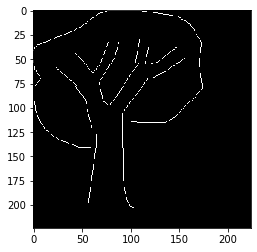

In [11]:
i = 45
plt.imshow(X[i])
y[i]

In [12]:
X_train, X_data, y_train, y_data = train_test_split(X,y,random_state=2045, test_size = 0.2)

In [13]:
X_valid, X_test, y_valid, y_test = train_test_split(X_data, y_data, random_state = 2045, test_size = 0.2)

In [14]:
batch_size = 32
epochs = 100
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [15]:
def create_model(base_model):
    base_model.trainable = True
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    prediction_layer = tf.keras.layers.Dense(5, activation='sigmoid')(global_average_layer)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    return model

def fit_model(model):
    history = model.fit(
                        X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_valid, y_valid)                        )
    return history



In [43]:
def plot_history(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'])
    plt.plot(epochs, history.history['val_accuracy'])
    plt.xlabel('epochs')
    plt.ylabel('accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'])
    plt.plot(epochs, history.history['val_loss'])
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()

In [18]:
IMG_SHAPE = (224, 224, 3)
base_model1 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model2 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
base_model3 = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")

model1 = create_model(base_model1)
history1 = fit_model(model1)
model1.save('models/model1.h5')

model2 = create_model(base_model2)

history2 = fit_model(model2)
model2.save('models/model2.h5')





Epoch 1/100
22/22 [==============================] - 23s 704ms/step - loss: 0.6214 - accuracy: 0.4293 - val_loss: 2.1965 - val_accuracy: 0.1286
Epoch 2/100
22/22 [==============================] - 13s 594ms/step - loss: 0.1622 - accuracy: 0.6066 - val_loss: 2.0575 - val_accuracy: 0.0929
Epoch 3/100
22/22 [==============================] - 13s 592ms/step - loss: 0.0659 - accuracy: 0.6642 - val_loss: 1.9657 - val_accuracy: 0.1214
Epoch 4/100
22/22 [==============================] - 13s 592ms/step - loss: 0.0353 - accuracy: 0.5705 - val_loss: 1.9538 - val_accuracy: 0.1214
Epoch 5/100
22/22 [==============================] - 13s 597ms/step - loss: 0.0203 - accuracy: 0.5370 - val_loss: 1.8636 - val_accuracy: 0.1286
Epoch 6/100
22/22 [==============================] - 13s 595ms/step - loss: 0.0152 - accuracy: 0.5310 - val_loss: 1.7855 - val_accuracy: 0.1357
Epoch 7/100
22/22 [==============================] - 13s 595ms/step - loss: 0.0117 - accuracy: 0.5103 - val_loss: 1.6990 - val_accuracy:

In [ ]:



model3 = create_model(base_model3)
history3 = fit_model(model3)
model3.save('models/model3.h5')

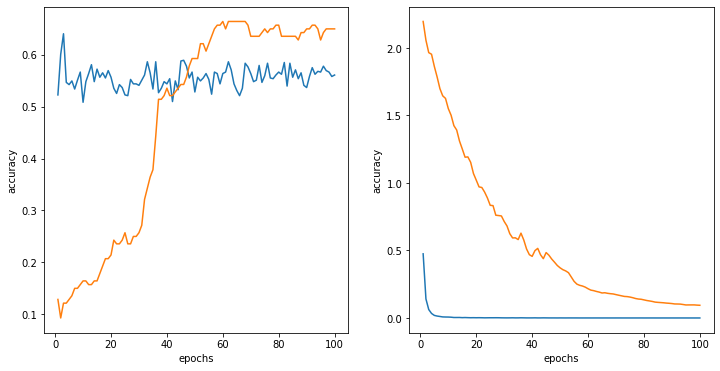

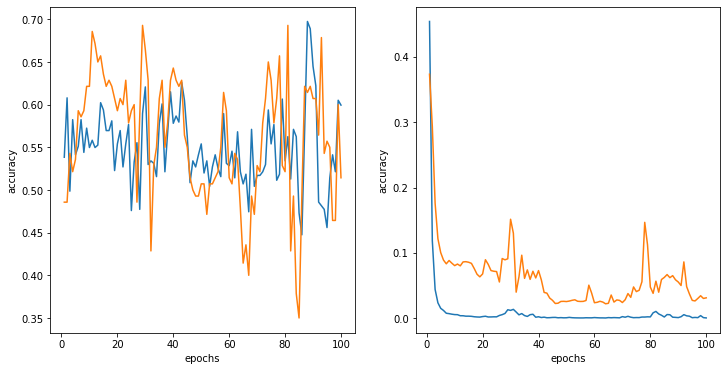

In [44]:
plot_history(history1)
plot_history(history2)



In [59]:
def load_all_models():
    all_models = []
    model_names = [ 'model1.h5', 'model2.h5']
    for model_name in model_names:
        filename = os.path.join('models', model_name)
        model = tf.keras.models.load_model(filename)
        all_models.append(model)
        print('loaded:', filename)
    return all_models
models = load_all_models()
for i, model in enumerate(models):
    for layer in model.layers:
        layer.trainable = False

loaded: models/model1.h5
loaded: models/model2.h5


In [60]:

def ensemble_model(models):
    for i, model in enumerate(models):
        for layer in model.layers:
            layer.trainable = False
    ensemble_visible = [model.input for model in models]
    ensemble_outputs = [model.output for model in models]
    merge = tf.keras.layers.concatenate(ensemble_outputs)
    merge = tf.keras.layers.Dense(10, activation='relu')(merge)
    output = tf.keras.layers.Dense(5, activation='sigmoid')(merge)
    model = tf.keras.models.Model(inputs=ensemble_visible, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
    return model

In [61]:
models = load_all_models()
model = ensemble_model(models)

loaded: models/model1.h5
loaded: models/model2.h5


In [71]:
X = [X_train for _ in range(len(model.input))]
X_1 = [X_test for _ in range(len(model.input))]
X_2 = [X_valid for _ in range(len(model.input))]

In [75]:
epochs = 100
history = model.fit(X, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_2, y_valid)
                    )

Epoch 1/100
22/22 [==============================] - 4s 201ms/step - loss: 0.2418 - accuracy: 0.5312 - val_loss: 0.2163 - val_accuracy: 0.6286
Epoch 2/100
22/22 [==============================] - 4s 199ms/step - loss: 0.2245 - accuracy: 0.7003 - val_loss: 0.2006 - val_accuracy: 0.7571
Epoch 3/100
22/22 [==============================] - 4s 198ms/step - loss: 0.2088 - accuracy: 0.7330 - val_loss: 0.1864 - val_accuracy: 0.7643
Epoch 4/100
22/22 [==============================] - 4s 199ms/step - loss: 0.1944 - accuracy: 0.7443 - val_loss: 0.1738 - val_accuracy: 0.7786
Epoch 5/100
22/22 [==============================] - 4s 198ms/step - loss: 0.1813 - accuracy: 0.7472 - val_loss: 0.1624 - val_accuracy: 0.7929
Epoch 6/100
22/22 [==============================] - 4s 198ms/step - loss: 0.1694 - accuracy: 0.7500 - val_loss: 0.1522 - val_accuracy: 0.7929
Epoch 7/100
22/22 [==============================] - 4s 199ms/step - loss: 0.1584 - accuracy: 0.7514 - val_loss: 0.1428 - val_accuracy: 0.7929

In [76]:
model.save('models/model.h5')


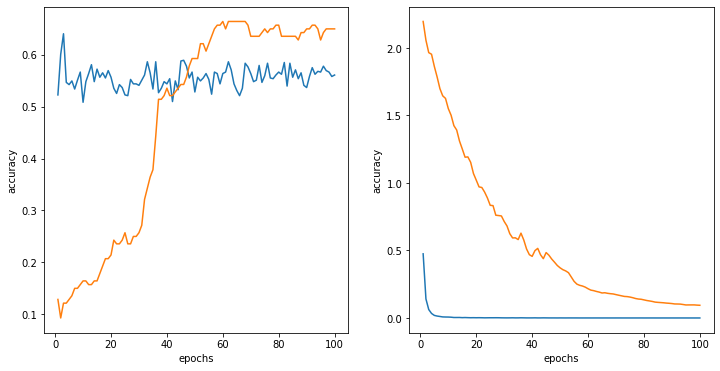

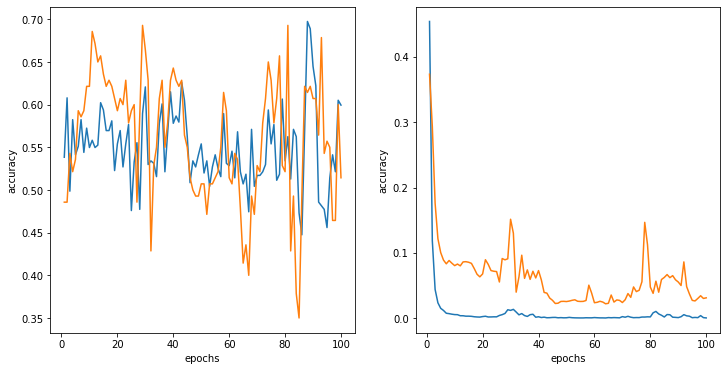

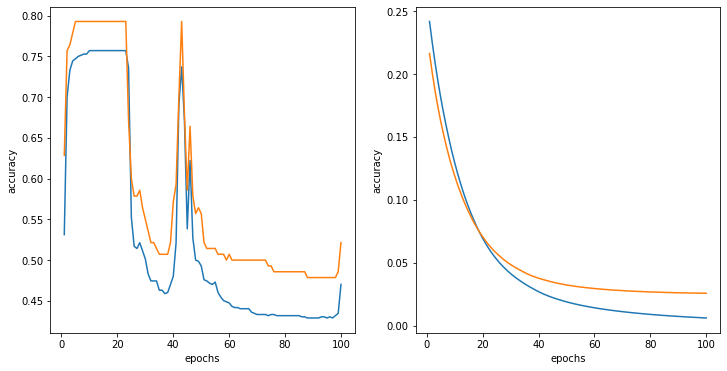

In [77]:
plot_history(history1)
plot_history(history2)
plot_history(history)



In [25]:
from tensorflow.keras.models import load_model
model1 = load_model('models/model1.h5')
model2 = load_model('models/model2.h5')
model3 = load_model('models/model3.h5')
model = load_model('models/model.h5')


In [31]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [78]:
loss, accuracy = model1.evaluate(X_test, y_test)

print(f'loss : {loss:.5f}')
print(f'accuracy : {accuracy:.5f}')

2/2 [==============================] - 0s 16ms/step - loss: 0.1014 - accuracy: 0.6944
loss : 0.10136
accuracy : 0.69444


In [79]:
loss, accuracy = model2.evaluate(X_test, y_test)

print(f'loss : {loss:.5f}')
print(f'accuracy : {accuracy:.5f}')

2/2 [==============================] - 0s 37ms/step - loss: 0.0535 - accuracy: 0.5278
loss : 0.05351
accuracy : 0.52778


In [42]:
loss, accuracy = model3.evaluate(X_test, y_test)

print(f'loss : {loss:.5f}')
print(f'accuracy : {accuracy:.5f}')

13/13 [==============================] - 4s 239ms/step - loss: 0.4478 - accuracy: 0.7214
loss : 0.44781
accuracy : 0.72139


In [80]:
loss, accuracy = model.evaluate(X_1, y_test)

print(f'loss : {loss:.5f}')
print(f'accuracy : {accuracy:.5f}')

2/2 [==============================] - 0s 44ms/step - loss: 0.0558 - accuracy: 0.5000
loss : 0.05575
accuracy : 0.50000


In [130]:
img = image.load_img('test/1.png', target_size=(224, 224, 1))
img = image.img_to_array(img)
img = img/255
img2 = [[img for _ in range(len(img))]]

In [127]:
img2

[[array([[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         ...,
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
  
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]], dtype=f

MobileNetV2 
flags.fruit : 0.7904166579246521
flags.branch : 0.7153016924858093
flags.root : 0.05093052610754967
flags.knot : 0.02559030055999756
flags.leaves : 0.01452433317899704
----------------------------------------------------------------------------------------------------
InceptionV3
flags.fruit : 0.05837863311171532
flags.branch : 0.6521865129470825
flags.root : 0.00175328622572124
flags.knot : 0.009610218927264214
flags.leaves : 0.07754384726285934


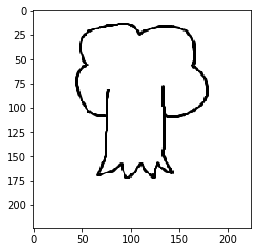

In [132]:
classes = np.array(data.columns[1:])
pred = model1.predict(img.reshape(1, 224, 224, 3))
top3 = np.argsort(pred[0])[:-8:-1]
print('MobileNetV2 ')
for i in range(5):
    print(f'{classes[top3[i]]} : {pred[0][top3[i]]}')
plt.imshow(img)

print('--'*50)
print('InceptionV3')
pred_1 = model2.predict(img.reshape(1, 224, 224, 3))
top3 = np.argsort(pred[0])[:-8:-1]
for i in range(5):
    print(f'{classes[top3[i]]} : {pred_1[0][top3[i]]}')




In [136]:
img = image.load_img('test/2.png', target_size=(224, 224, 1))
img = image.img_to_array(img)
img = img/255

MobileNetV2 
flags.branch : 0.9917821884155273
flags.fruit : 0.30446821451187134
flags.root : 0.0033963846508413553
flags.knot : 0.0025819980073720217
flags.leaves : 0.0008714046562090516
----------------------------------------------------------------------------------------------------
InceptionV3
flags.branch : 0.6566193699836731
flags.fruit : 0.07290118932723999
flags.root : 0.0022251636255532503
flags.knot : 0.007394388783723116
flags.leaves : 0.0484488382935524


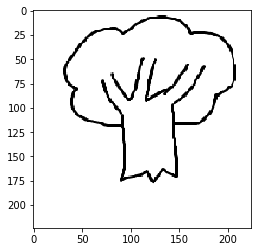

In [137]:
classes = np.array(data.columns[1:])
pred = model1.predict(img.reshape(1, 224, 224, 3))
top3 = np.argsort(pred[0])[:-8:-1]
print('MobileNetV2 ')
for i in range(5):
    print(f'{classes[top3[i]]} : {pred[0][top3[i]]}')
plt.imshow(img)

print('--'*50)
print('InceptionV3')
pred_1 = model2.predict(img.reshape(1, 224, 224, 3))
top3 = np.argsort(pred[0])[:-8:-1]
for i in range(5):
    print(f'{classes[top3[i]]} : {pred_1[0][top3[i]]}')




In [140]:
img = image.load_img('test/3.png', target_size=(224, 224, 1))
img = image.img_to_array(img)
img = img/255

MobileNetV2 
flags.fruit : 0.8875876069068909
flags.branch : 0.3682864308357239
flags.knot : 0.071316197514534
flags.leaves : 0.03664308786392212
flags.root : 0.013658852316439152
----------------------------------------------------------------------------------------------------
InceptionV3
flags.fruit : 0.04980103671550751
flags.branch : 0.46087443828582764
flags.knot : 0.13352425396442413
flags.leaves : 0.5424174070358276
flags.root : 0.002030825475230813


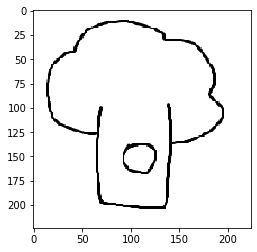

In [141]:
classes = np.array(data.columns[1:])
pred = model1.predict(img.reshape(1, 224, 224, 3))
top3 = np.argsort(pred[0])[:-8:-1]
print('MobileNetV2 ')
for i in range(5):
    print(f'{classes[top3[i]]} : {pred[0][top3[i]]}')
plt.imshow(img)

print('--'*50)
print('InceptionV3')
pred_1 = model2.predict(img.reshape(1, 224, 224, 3))
top3 = np.argsort(pred[0])[:-8:-1]
for i in range(5):
    print(f'{classes[top3[i]]} : {pred_1[0][top3[i]]}')




In [142]:
img = image.load_img('test/4.png', target_size=(224, 224, 1))
img = image.img_to_array(img)
img = img/255

MobileNetV2 
flags.fruit : 0.93166184425354
flags.branch : 0.30411723256111145
flags.root : 0.08111820369958878
flags.leaves : 0.024117300286889076
flags.knot : 0.017566759139299393
----------------------------------------------------------------------------------------------------
InceptionV3
flags.fruit : 0.2957097589969635
flags.branch : 0.3031962811946869
flags.root : 0.0013990937732160091
flags.leaves : 0.786235511302948
flags.knot : 0.01683330163359642


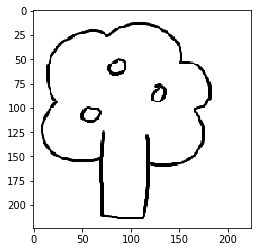

In [143]:
classes = np.array(data.columns[1:])
pred = model1.predict(img.reshape(1, 224, 224, 3))
top3 = np.argsort(pred[0])[:-8:-1]
print('MobileNetV2 ')
for i in range(5):
    print(f'{classes[top3[i]]} : {pred[0][top3[i]]}')
plt.imshow(img)

print('--'*50)
print('InceptionV3')
pred_1 = model2.predict(img.reshape(1, 224, 224, 3))
top3 = np.argsort(pred[0])[:-8:-1]
for i in range(5):
    print(f'{classes[top3[i]]} : {pred_1[0][top3[i]]}')




In [144]:
img = image.load_img('test/5.png', target_size=(224, 224, 1))
img = image.img_to_array(img)
img = img/255

MobileNetV2 
flags.branch : 0.9913989305496216
flags.fruit : 0.13184283673763275
flags.root : 0.013131457380950451
flags.knot : 0.0011222338071092963
flags.leaves : 4.326569978729822e-05
----------------------------------------------------------------------------------------------------
InceptionV3
flags.branch : 0.7431188821792603
flags.fruit : 0.022064723074436188
flags.root : 0.0008321789209730923
flags.knot : 0.0133742056787014
flags.leaves : 0.011903743259608746


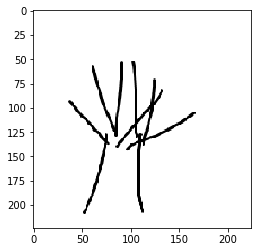

In [145]:
classes = np.array(data.columns[1:])
pred = model1.predict(img.reshape(1, 224, 224, 3))
top3 = np.argsort(pred[0])[:-8:-1]
print('MobileNetV2 ')
for i in range(5):
    print(f'{classes[top3[i]]} : {pred[0][top3[i]]}')
plt.imshow(img)

print('--'*50)
print('InceptionV3')
pred_1 = model2.predict(img.reshape(1, 224, 224, 3))
top3 = np.argsort(pred[0])[:-8:-1]
for i in range(5):
    print(f'{classes[top3[i]]} : {pred_1[0][top3[i]]}')




In [150]:
def result(model):
    classes = np.array(data.columns[1:6])

    y_true = y_test

    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)

    print(classes)
    multilabel_confusion_matrix(y_true, y_pred)
    print(metrics.classification_report(y_true, y_pred))

In [156]:
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix

print("MobileNetV2")
result(model1)
print('InceptionV3')
result(model2)


MobileNetV2
['flags.root' 'flags.branch' 'flags.fruit' 'flags.leaves' 'flags.knot']
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         3
           3       1.00      0.97      0.98        31
           4       1.00      0.88      0.93         8

   micro avg       1.00      0.94      0.97        69
   macro avg       1.00      0.93      0.96        69
weighted avg       1.00      0.94      0.97        69
 samples avg       1.00      0.95      0.97        69

InceptionV3
['flags.root' 'flags.branch' 'flags.fruit' 'flags.leaves' 'flags.knot']
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.91      1.00      0.95        20
           2       1.00      1.00      1.00         3
           3       1.00      0.97      0.98        31
           4      